In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import itertools

In [2]:
pd.set_option('display.max_columns', None)


In [3]:
train_df = pd.read_csv("raw_data/train.csv")
test_df = pd.read_csv("raw_data/test.csv")

In [4]:
train_df.shape, test_df.shape

((45593, 20), (11399, 19))

In [5]:
train_df.drop(columns=["Time_taken(min)"], inplace = True)
train_df = pd.concat([train_df, test_df], axis = 0)

In [6]:
train_df.shape

(56992, 19)

In [7]:
test_df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05:00,conditions NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,20:35:00,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,19:45:00,conditions Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian
3,0x72ee,JAPRES07DEL03,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,17:20:00,conditions Fog,Medium,1,Meal,scooter,1,No,Metropolitian
4,0xa759,CHENRES19DEL01,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,18:40:00,conditions Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian


In [8]:
train_df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56992 entries, 0 to 11398
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           56992 non-null  object 
 1   Delivery_person_ID           56992 non-null  object 
 2   Delivery_person_Age          56992 non-null  object 
 3   Delivery_person_Ratings      56992 non-null  object 
 4   Restaurant_latitude          56992 non-null  float64
 5   Restaurant_longitude         56992 non-null  float64
 6   Delivery_location_latitude   56992 non-null  float64
 7   Delivery_location_longitude  56992 non-null  float64
 8   Order_Date                   56992 non-null  object 
 9   Time_Orderd                  56992 non-null  object 
 10  Time_Order_picked            56992 non-null  object 
 11  Weatherconditions            56992 non-null  object 
 12  Road_traffic_density         56992 non-null  object 
 13  Vehicle_condition    

In [10]:
train_df.isna().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
dtype: int64

In [11]:
train_df["Order_Date"] = pd.to_datetime(train_df["Order_Date"])

/var/folders/x6/npt_81hx5z118fvsw6w6qh900000gn/T/ipykernel_44757/2684525328.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train_df["Order_Date"] = pd.to_datetime(train_df["Order_Date"])


In [12]:
train_df.drop(index = train_df.loc[~train_df["Time_Orderd"].str.contains(":")].index, inplace=True)

In [13]:
train_df["Time_Orderd"] = pd.to_datetime(train_df["Time_Orderd"])
train_df["Time_Orderd"] = train_df["Time_Orderd"].dt.time

train_df["Time_Order_picked"] = pd.to_datetime(train_df["Time_Order_picked"])
train_df["Time_Order_picked"] = train_df["Time_Order_picked"].dt.time

/var/folders/x6/npt_81hx5z118fvsw6w6qh900000gn/T/ipykernel_44757/2706687689.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df["Time_Orderd"] = pd.to_datetime(train_df["Time_Orderd"])
/var/folders/x6/npt_81hx5z118fvsw6w6qh900000gn/T/ipykernel_44757/2706687689.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df["Time_Order_picked"] = pd.to_datetime(train_df["Time_Order_picked"])


In [14]:
train_df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian
5,0x9bb4,HYDRES09DEL03,22,4.8,17.431668,78.408321,17.461668,78.438321,2022-03-11,21:20:00,21:30:00,conditions Cloudy,Jam,0,Buffet,motorcycle,1,No,Urban


In [15]:
train_df = train_df.sort_values(by = ["Order_Date", "Time_Orderd", "Time_Order_picked"])

In [16]:
train_df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
24044,0xc401,LUDHRES11DEL02,25,4.6,30.893081,75.821495,30.943081,75.871495,2022-02-11,00:00:00,00:05:00,conditions Sandstorms,Low,1,Snack,scooter,0,No,Metropolitian
29560,0xd300,KOCRES05DEL03,39,4.6,9.970717,76.285447,10.030717,76.345447,2022-02-11,00:00:00,00:05:00,conditions Windy,Low,2,Snack,motorcycle,1,No,Metropolitian
608,0xd152,BHPRES15DEL03,38,4.8,23.234249,77.434007,23.294249,77.494007,2022-02-11,00:00:00,00:10:00,conditions Fog,Low,1,Meal,scooter,1,No,Urban
37357,0xc614,DEHRES04DEL03,36,4.9,30.340722,78.060221,30.370722,78.090221,2022-02-11,00:00:00,00:10:00,conditions Sunny,Low,1,Drinks,motorcycle,0,No,Urban
24009,0xceea,LUDHRES18DEL02,33,4.9,30.890184,75.829615,30.910184,75.849615,2022-02-11,08:10:00,08:15:00,conditions Sunny,Low,2,Drinks,scooter,1,No,Urban


In [17]:
train_df["Delivery_city"] = train_df["Delivery_person_ID"].apply(lambda x: x[:x.index("RES")])

In [18]:
grouped = train_df.groupby(by = "Delivery_city")["Order_Date"].agg(['min', 'max', 'count'])
grouped

,min,max,count
Delivery_city,,,
AGR,2022-02-11,2022-02-18,889
ALH,2022-02-11,2022-02-18,883
AURG,2022-02-11,2022-02-18,838
BANG,2022-03-01,2022-04-06,3728
BHP,2022-02-11,2022-02-18,833
CHEN,2022-03-01,2022-04-06,3743
COIMB,2022-03-01,2022-04-06,3760
DEH,2022-02-11,2022-02-18,871
GOA,2022-02-11,2022-02-18,836


In [19]:
filtered_df = train_df.loc[train_df["Order_Date"] >= "2022-03-01"]
filtered_df.shape

(45353, 20)

In [20]:
grouped = filtered_df.groupby(by = "Delivery_city")["Order_Date"].agg(['min', 'max', 'count'])
grouped

,min,max,count
Delivery_city,,,
BANG,2022-03-01,2022-04-06,3728
CHEN,2022-03-01,2022-04-06,3743
COIMB,2022-03-01,2022-04-06,3760
HYD,2022-03-01,2022-04-06,3751
INDO,2022-03-01,2022-04-06,3763
JAP,2022-03-01,2022-04-06,4131
MUM,2022-03-01,2022-04-06,3745
MYS,2022-03-01,2022-04-06,3760
PUNE,2022-03-01,2022-04-06,3731


In [21]:
non_zero_lat_long = filtered_df.loc[(filtered_df["Restaurant_latitude"] > 0) & (filtered_df["Restaurant_longitude"] > 0)]
grouped_non_zero_mean = (non_zero_lat_long
                         .groupby(by = "Delivery_city")[["Restaurant_latitude", "Restaurant_longitude", "Delivery_location_latitude", "Delivery_location_longitude"]]
                         .mean()
                         .reset_index())


In [22]:
grouped_non_zero_mean

,Delivery_city,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
0,BANG,12.955228,77.634423,13.017838,77.697033
1,CHEN,13.034829,80.238264,13.097559,80.300994
2,COIMB,11.009958,76.978263,11.072623,77.040928
3,HYD,17.436485,78.409170,17.499253,78.471938
4,INDO,22.736742,75.888179,22.799639,75.951076
5,JAP,26.895948,75.794552,26.964813,75.863417
6,MUM,19.114468,72.848577,19.177184,72.911293
7,MYS,12.319137,76.631933,12.381946,76.694742
8,PUNE,18.550973,73.849924,18.613621,73.912572
9,RANCHI,23.365000,85.331027,23.428072,85.394099


In [23]:
zero_lat_long = filtered_df.loc[(filtered_df["Restaurant_latitude"] == 0) | (filtered_df["Restaurant_longitude"] == 0)]
zero_merged = pd.merge(left = zero_lat_long, right = grouped_non_zero_mean, on = "Delivery_city")
zero_merged.drop(columns=["Restaurant_latitude_x", "Restaurant_longitude_x", "Delivery_location_latitude_x", "Delivery_location_longitude_x"], inplace=True)
zero_merged.rename(columns={"Restaurant_latitude_y": "Restaurant_latitude",
                            "Restaurant_longitude_y": "Restaurant_longitude",
                            "Delivery_location_latitude_y": "Delivery_location_latitude",
                            "Delivery_location_longitude_y": "Delivery_location_longitude"},
                    inplace=True)

In [24]:
zero_merged

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Delivery_city,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
0,0x8524,VADRES02DEL02,33,4.5,2022-03-01,08:25:00,08:35:00,conditions Sandstorms,Low,2,Drinks,scooter,1,No,Metropolitian,VAD,22.311448,73.166956,22.374368,73.229876
1,0xbbbf,VADRES17DEL01,20,4.7,2022-03-01,08:30:00,08:35:00,conditions Windy,Low,1,Drinks,scooter,0,No,Metropolitian,VAD,22.311448,73.166956,22.374368,73.229876
2,0x13ae,MYSRES14DEL02,NaN,NaN,2022-03-01,08:35:00,08:40:00,conditions Sandstorms,Low,2,Meal,motorcycle,1,No,Metropolitian,MYS,12.319137,76.631933,12.381946,76.694742
3,0xab53,VADRES04DEL01,20,4.6,2022-03-01,08:45:00,08:50:00,conditions Cloudy,Low,2,Buffet,scooter,0,No,Urban,VAD,22.311448,73.166956,22.374368,73.229876
4,0xb838,VADRES12DEL01,34,4.4,2022-03-01,08:45:00,08:55:00,conditions Windy,Low,0,Buffet,motorcycle,1,No,Metropolitian,VAD,22.311448,73.166956,22.374368,73.229876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2804,0xb2dc,VADRES08DEL02,26,4.7,2022-04-06,23:35:00,23:40:00,conditions Cloudy,Low,0,Meal,motorcycle,NaN,No,Urban,VAD,22.311448,73.166956,22.374368,73.229876
2805,0x6f4a,VADRES08DEL03,20,5,2022-04-06,23:35:00,23:45:00,conditions Sandstorms,Low,1,Drinks,scooter,1,No,Metropolitian,VAD,22.311448,73.166956,22.374368,73.229876
2806,0xa213,RANCHIRES02DEL02,32,4.6,2022-04-06,23:40:00,23:50:00,conditions Stormy,Low,1,Buffet,motorcycle,0,No,Urban,RANCHI,23.365000,85.331027,23.428072,85.394099
2807,0x9082,VADRES02DEL01,31,3.9,2022-04-06,23:45:00,23:50:00,conditions Cloudy,Low,2,Drinks,scooter,1,No,Metropolitian,VAD,22.311448,73.166956,22.374368,73.229876


In [25]:
filtered_df.shape

(45353, 20)

In [26]:
filtered_df.drop(index = zero_lat_long.index, inplace=True)
filtered_df = pd.concat([filtered_df, zero_merged], axis = 0)
filtered_df.shape

/var/folders/x6/npt_81hx5z118fvsw6w6qh900000gn/T/ipykernel_44757/1431944950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(index = zero_lat_long.index, inplace=True)


(44515, 20)

<Axes: xlabel='Restaurant_longitude', ylabel='Restaurant_latitude'>

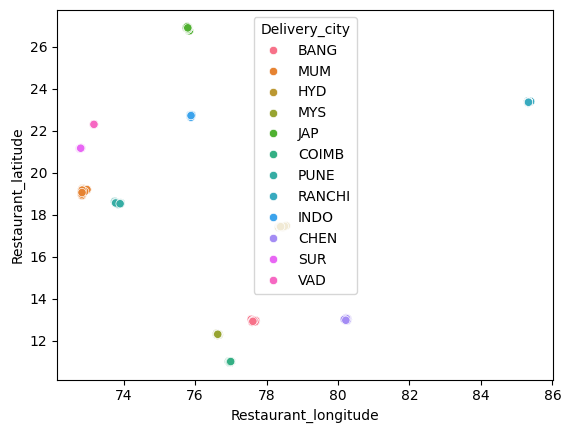

In [27]:
sns.scatterplot(data=filtered_df, x = "Restaurant_longitude", y = "Restaurant_latitude", hue="Delivery_city")

In [28]:
region_dict = {"CHEN": 1, "BANG": 1, "MUM": 2, "HYD": 1, "MYS": 1, "COIMB": 1, "PUNE": 2, "RANCHI": 3, "INDO": 4, "JAP": 4, "SUR": 2, "VAD": 2}
filtered_df["Region"] = filtered_df["Delivery_city"].apply(lambda x: region_dict.get(x))

<Axes: xlabel='Restaurant_longitude', ylabel='Restaurant_latitude'>

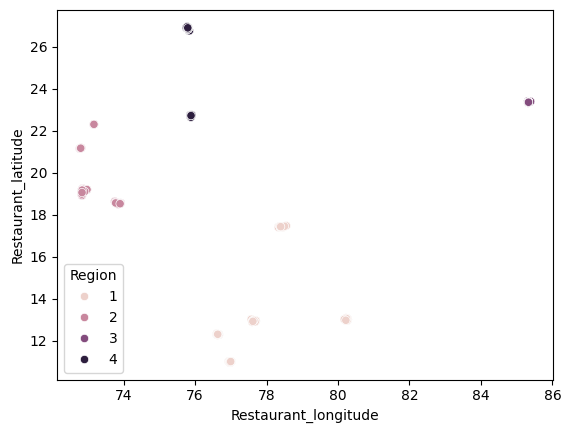

In [29]:
sns.scatterplot(data=filtered_df, x = "Restaurant_longitude", y = "Restaurant_latitude", hue="Region")

In [30]:
filtered_df = filtered_df.sort_values(by = ["Order_Date", "Time_Orderd", "Time_Order_picked"])

In [31]:
filtered_df["order_hour"] = filtered_df["Time_Orderd"].apply(lambda x: int(str(x)[:2]))

In [32]:
filtered_df["Weatherconditions"] = filtered_df["Weatherconditions"].apply(lambda x: ''.join(x.split()[1:]))

In [33]:
filtered_df.head(20)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Delivery_city,Region,order_hour
25679,0x2cda,BANGRES12DEL02,20,5,12.939496,77.625999,12.989496,77.675999,2022-03-01,00:00:00,00:05:00,Sunny,Low,2,Drinks,electric_scooter,1,No,Metropolitian,BANG,1,0
10789,0x3eff,MUMRES18DEL03,26,4.5,19.109300,72.825451,19.169300,72.885451,2022-03-01,00:00:00,00:05:00,Windy,Low,0,Snack,motorcycle,1,No,Metropolitian,MUM,2,0
4443,0x530a,MUMRES010DEL02,28,4.7,19.003517,72.827650,19.053517,72.877650,2022-03-01,00:00:00,00:10:00,Fog,Low,1,Meal,motorcycle,1,No,NaN,MUM,2,0
8937,0x7f01,HYDRES12DEL02,35,4.5,17.429585,78.392621,17.479585,78.442621,2022-03-01,00:00:00,00:10:00,Cloudy,Low,2,Buffet,scooter,0,No,Metropolitian,HYD,1,0
9804,0x795f,MUMRES14DEL03,39,4.9,19.181300,72.836191,19.241300,72.896191,2022-03-01,00:00:00,00:10:00,Sunny,Low,2,Buffet,electric_scooter,0,No,Metropolitian,MUM,2,0
12336,0x6050,MYSRES16DEL02,34,4.9,12.316967,76.603067,12.366967,76.653067,2022-03-01,00:00:00,00:15:00,Sunny,Low,2,Drinks,electric_scooter,1,No,Metropolitian,MYS,1,0
15966,0x8e61,MUMRES05DEL03,38,4.6,18.927584,72.832585,18.957584,72.862585,2022-03-01,00:00:00,00:15:00,Windy,Low,2,Buffet,motorcycle,1,No,Metropolitian,MUM,2,0
18929,0x53b5,MYSRES03DEL03,29,4.5,12.299524,76.642620,12.359524,76.702620,2022-03-01,00:00:00,00:15:00,Fog,Low,2,Snack,motorcycle,1,No,Urban,MYS,1,0
1088,0xae01,JAPRES01DEL02,21,4.1,26.905190,75.810753,26.955190,75.860753,2022-03-01,00:00:00,00:15:00,Stormy,Low,0,Buffet,motorcycle,1,No,Metropolitian,JAP,4,0
37035,0x2bad,COIMBRES15DEL02,37,5,11.006686,76.951736,11.026686,76.971736,2022-03-01,08:10:00,08:15:00,Sandstorms,Low,2,Drinks,motorcycle,0,No,Metropolitian,COIMB,1,8


In [34]:
def clean_weather(hour, weather):
    if type(weather) == str:
        if ((hour > 19) | (hour < 5)) & (weather == "Sunny"):
            return "Clear"
        if weather == "Sandstorms":
            return "Windy"
        return weather
    else:
        if (hour > 19) | (hour < 5):
            if "Sunny" in weather:
                weather = [x for x in weather if x != "Sunny"]
        weather_value = weather[random.randint(0, len(weather)-1)]
        if weather_value == "Sandstorms":
            return "Windy"
        return weather_value


In [35]:
def clean_road_info(road_info):
    if type(road_info) != str:
        return road_info[0]
    return road_info

In [36]:
filtered_grouped = filtered_df.groupby(by = ["Region", "Order_Date","order_hour"]).agg({"Weatherconditions": pd.Series.mode, "Road_traffic_density": pd.Series.mode,"ID": "count"}).reset_index()
filtered_grouped.head()

,Region,Order_Date,order_hour,Weatherconditions,Road_traffic_density,ID
0,1,2022-03-01,0,Sunny,Low,4
1,1,2022-03-01,8,Stormy,Low,46
2,1,2022-03-01,9,Windy,Low,50
3,1,2022-03-01,10,Sunny,Low,38
4,1,2022-03-01,11,Sandstorms,High,41


In [37]:
filtered_grouped["Road_traffic_density"].value_counts()

Road_traffic_density
Low                 629
Jam                 432
Medium              430
High                286
[High , Medium ]      1
[Jam , Low ]          1
[High , Medium ]      1
Name: count, dtype: int64

In [38]:
filtered_grouped["Weatherconditions"] = filtered_grouped.apply(lambda x: clean_weather(x["order_hour"], x["Weatherconditions"]), axis = 1)
filtered_grouped["Road_traffic_density"] = filtered_grouped["Road_traffic_density"].apply(lambda x: clean_road_info(x))

In [39]:
filtered_grouped.rename(columns = {"ID": "Order Count"}, inplace = True)

In [40]:
filtered_grouped.sort_values(by = ["Region","Order_Date", "order_hour"], inplace = True)
filtered_grouped

,Region,Order_Date,order_hour,Weatherconditions,Road_traffic_density,Order Count
0,1,2022-03-01,0,Clear,Low,4
1,1,2022-03-01,8,Stormy,Low,46
2,1,2022-03-01,9,Windy,Low,50
3,1,2022-03-01,10,Sunny,Low,38
4,1,2022-03-01,11,Windy,High,41
...,...,...,...,...,...,...
1775,4,2022-04-06,19,Stormy,Jam,27
1776,4,2022-04-06,20,Windy,Jam,31
1777,4,2022-04-06,21,Stormy,Jam,26
1778,4,2022-04-06,22,Stormy,Low,37


In [41]:
regions = filtered_grouped["Region"].unique()
dates = filtered_grouped["Order_Date"].unique()
hours = np.arange(0,24, dtype=int)

In [42]:
combinations = list(itertools.product(regions, dates, hours))

all_hours = pd.DataFrame(combinations, columns=['Region', 'Order_Date', 'order_hour'])

In [43]:
all_hours_merged = pd.merge(all_hours, filtered_grouped, how='left', on=['Region', 'Order_Date', 'order_hour'])
all_hours_merged


,Region,Order_Date,order_hour,Weatherconditions,Road_traffic_density,Order Count
0,1,2022-03-01,0,Clear,Low,4.0
1,1,2022-03-01,1,NaN,NaN,NaN
2,1,2022-03-01,2,NaN,NaN,NaN
3,1,2022-03-01,3,NaN,NaN,NaN
4,1,2022-03-01,4,NaN,NaN,NaN
...,...,...,...,...,...,...
3451,4,2022-04-06,19,Stormy,Jam,27.0
3452,4,2022-04-06,20,Windy,Jam,31.0
3453,4,2022-04-06,21,Stormy,Jam,26.0
3454,4,2022-04-06,22,Stormy,Low,37.0


In [44]:
def fill_road_info(hour, road_info):
    if type(road_info) == str:
        return road_info
    if hour < 11:
        return "Low"
    elif hour >= 11 & hour < 15:
        return "High"
    elif hour >= 15 & hour < 19:
        return "Medium"
    elif hour >= 19 & hour < 22:
        return "Jam"
    else:
        return "Low"
    

In [45]:
all_hours_merged["Road_traffic_density"].fillna(0, inplace = True)
all_hours_merged["Road_traffic_density"] = all_hours_merged.apply(lambda x: fill_road_info(x["order_hour"], x["Road_traffic_density"]), axis = 1)

/var/folders/x6/npt_81hx5z118fvsw6w6qh900000gn/T/ipykernel_44757/2519158603.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_hours_merged["Road_traffic_density"].fillna(0, inplace = True)


In [46]:
def fix_count(orders):
    if orders > 0:
        return int(orders * random.randint(80,101))
    else:
        return random.randint(50,100)

In [47]:
all_hours_merged["Order Count"].fillna(0, inplace = True)
all_hours_merged["Order Count"] = all_hours_merged["Order Count"].apply(lambda x: fix_count(x))

/var/folders/x6/npt_81hx5z118fvsw6w6qh900000gn/T/ipykernel_44757/340489191.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_hours_merged["Order Count"].fillna(0, inplace = True)


In [48]:
all_hours_merged

,Region,Order_Date,order_hour,Weatherconditions,Road_traffic_density,Order Count
0,1,2022-03-01,0,Clear,Low,336
1,1,2022-03-01,1,NaN,Low,74
2,1,2022-03-01,2,NaN,Low,51
3,1,2022-03-01,3,NaN,Low,81
4,1,2022-03-01,4,NaN,Low,81
...,...,...,...,...,...,...
3451,4,2022-04-06,19,Stormy,Jam,2160
3452,4,2022-04-06,20,Windy,Jam,2573
3453,4,2022-04-06,21,Stormy,Jam,2418
3454,4,2022-04-06,22,Stormy,Low,3219


In [49]:
all_hours_merged["Weatherconditions"] = all_hours_merged["Weatherconditions"].fillna(method='ffill')

/var/folders/x6/npt_81hx5z118fvsw6w6qh900000gn/T/ipykernel_44757/1786760485.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  all_hours_merged["Weatherconditions"] = all_hours_merged["Weatherconditions"].fillna(method='ffill')


In [50]:
all_hours_merged

,Region,Order_Date,order_hour,Weatherconditions,Road_traffic_density,Order Count
0,1,2022-03-01,0,Clear,Low,336
1,1,2022-03-01,1,Clear,Low,74
2,1,2022-03-01,2,Clear,Low,51
3,1,2022-03-01,3,Clear,Low,81
4,1,2022-03-01,4,Clear,Low,81
...,...,...,...,...,...,...
3451,4,2022-04-06,19,Stormy,Jam,2160
3452,4,2022-04-06,20,Windy,Jam,2573
3453,4,2022-04-06,21,Stormy,Jam,2418
3454,4,2022-04-06,22,Stormy,Low,3219


In [51]:
all_hours_merged.to_csv("raw_data/all_data_cleaned.csv", index = False)